# **Final Project: Checkpoint 2**
(5 points) Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c) organize (e.g., set up a database or a pandas DataFrame).

(20 points) Basic data exploration and summary statistics
 - You must present three conclusions using at least three different statistical
methods including hypothesis testing.
    - For example: What are the main characteristics of your dataset? How
many features and entries are there? Is a feature over-represented? Are
features correlated? Are there outliers? Identify the attributes that will
affect your choice of primary analysis technique. Etcetera.
 - For each method, you must have at least one gorgeous plot.

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, wilcoxon
import scipy.stats
import datetime


In [ ]:
# https://www.fec.gov/data/candidates/president/presidential-map/ 
# spending - allcandidates 
spending_df = pd.read_csv("spending_data.csv", index_col=False)
spending_df

In [ ]:
pd.read_csv("weball24.txt", delimiter='|')

In [101]:
polling_df = pd.read_csv('presidential_general_averages.csv')
polling_df['date'] = pd.to_datetime(polling_df['date']).dt.date

harris_df = polling_df[(polling_df['candidate'].str.contains('Harris')) & (polling_df['date'] >= datetime.date(2024, 7, 24)) & (polling_df['state'] == 'National')][['date', 'pct_estimate']]

trump_df = polling_df[(polling_df['candidate'].str.contains('Trump')) & (polling_df['date'] >= datetime.date(2024, 7, 24)) & (polling_df['state'] == 'National')][['date', 'pct_estimate']]

wilcoxon(harris_df['pct_estimate'], trump_df['pct_estimate'], alternative='greater')

WilcoxonResult(statistic=3828.0, pvalue=2.7300907074731046e-16)

Conclusion: 
The 'date' column is stored as a string and must be converted to a datetime value before use. The pct_trend_adjusted and pct_estimate columns are mutually exclusive, all rows which have a number in the pct_trend_adjusted column have NaN in the pct_estimate column, and vice versa. All of the most recent polls have pct_estimate and not pct_trend_adjusted. Some of the entries contain the full names of the candidates, e.g. 'Joseph R. Biden', while others only contain the last name 'Biden'. The polls include both state specific poll numbers and national averages. 

In the code below, a one-tailed Wilcoxon Signed-Rank test is performed where the pairs consist of the national poll averages for Harris and Trump on the same date. This test was chosen because the polling numbers for Harris and Trump are related, especially on the same date, and polling averages cannot safely be assumed to be normal over time.

$H_0 = \mu_{\text{Harris}} <= \mu_{\text{Trump}}$\
$H_A = \mu_{\text{Harris}} > \mu_{\text{Trump}}$

$\alpha = 0.05$

Wilcoxon Test Results:
test statistic: 3828.0
p-value (right-tailed) = 2.730e-16

Since p-value < $\alpha$, we reject the null hypothesis. Given the incredibly small p-value, it is incredibly unlikely that Harris's national polling numbers are less than or equal to Trump's. Harris's poll numbers are greater than Trump's in a statistically significant manner.

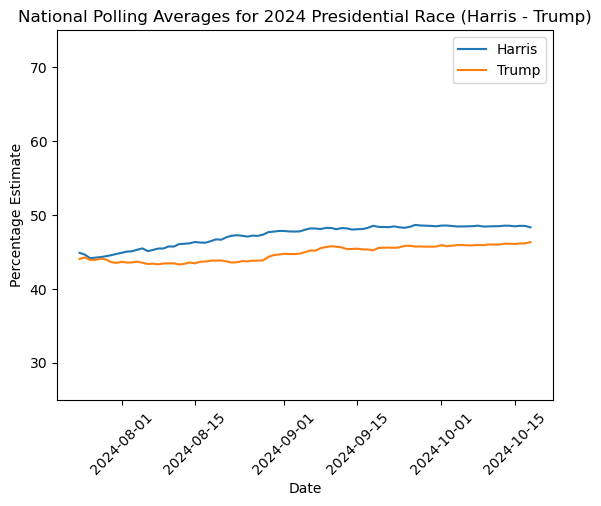

In [109]:
sns.lineplot(data=harris_df, x='date', y='pct_estimate', label='Harris')
sns.lineplot(data=trump_df, x='date', y='pct_estimate', label='Trump')

plt.title('National Polling Averages for 2024 Presidential Race (Harris - Trump)')
plt.xlabel('Date')
plt.ylabel('Percentage Estimate')

plt.xticks(rotation=45)
plt.ylim(bottom=25, top=75)
plt.show()